In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
by_sex = tips.groupby('sex').mean()
by_sex

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


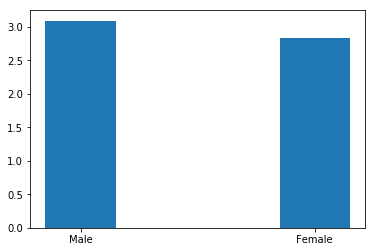

In [4]:
# 单个序列画柱状图
plt.bar(by_sex.index, by_sex.tip, width=0.3)
plt.show()

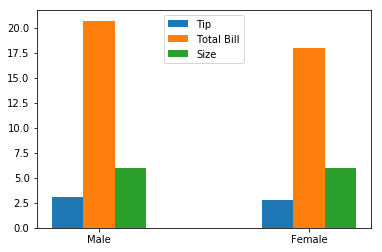

In [5]:
# 多序列画柱状图需要做叠加，注意后续序列的x坐标偏移
width = 0.15

x = np.arange(len(by_sex))

fig = plt.figure()
plt.bar(x, by_sex.tip, width=width, label='Tip')
plt.bar(x + width, by_sex.total_bill, width=width, label='Total Bill')
plt.bar(x + width * 2, by_sex.size, width=width, label='Size')


# 调节标签位置
ax = fig.axes[0]
ax.set_xticks(x + width)
ax.set_xticklabels(by_sex.index)
legend = plt.legend(loc='upper center')

plt.show()

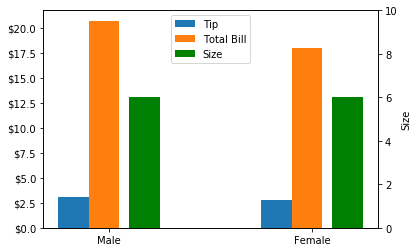

In [6]:
# 考虑到size的单位不是价格，情况会更加复杂
width = 0.15
gap = 0.05

x = np.arange(len(by_sex))

fig = plt.figure()

p1 = plt.bar(x, by_sex.tip, width=width, label='Tip')
p2 = plt.bar(x + width, by_sex.total_bill, width=width, label='Total Bill')

from matplotlib.ticker import FuncFormatter
ax = fig.axes[0]
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, n: '$' + str(x)))

# 创建一个辅助轴
ax2 = ax.twinx()
p3 = ax2.bar(x + width * 2 + gap, by_sex.size, width=width, label='Size', color='g')
ax2.set_ylabel('Size')
ax2.set_ylim(0, 10)

# 调节标签位置
ax.set_xticks(x + width + gap / 2)
ax.set_xticklabels(by_sex.index)


plt.legend(handles=[p1, p2, p3], loc='upper center')
plt.show()

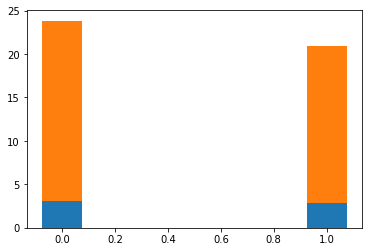

In [7]:
# 垂直堆叠会简单一些
width = 0.15
x = np.arange(len(by_sex.index))
p1 = plt.bar(x, by_sex.tip, width=width, label='Tip')
p2 = plt.bar(x, by_sex.total_bill,bottom=by_sex.tip, width=width, label='Total Bill')
plt.show()

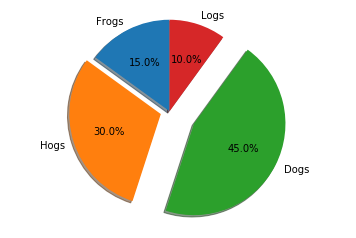

In [8]:
# 饼图根据label序列逆时针绘制
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# 传入的大小是不用归一化的
sizes = [15, 30, 45, 10]
# 可以指定分离距离
explode = (0, 0.1, 0.3, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# 绘制饼图时一般指定两轴等尺度，否则有可能变成椭圆形
ax1.axis('equal')

plt.show()

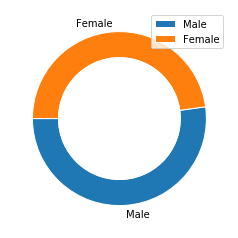

In [20]:
# 一个技巧是在饼图内部绘制一块子图，使其变为圆环图
fig, ax = plt.subplots()

size = 0.3

ax.pie(by_sex.tip, radius=1,
       wedgeprops=dict(width=size, edgecolor='w'), labels=by_sex.index, startangle=180)

ax.pie([1], radius=1-size, colors='w',
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend()
ax.set(aspect="equal")
plt.show()